In [1]:
from google.colab import files


uploaded = files.upload()

Saving google_stock_price.csv to google_stock_price.csv


In [2]:
import pandas as pd

df = pd.read_csv('google_stock_price.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-04-22,61.833500,62.716999,61.668499,62.688000,62.688000,19084000
1,2019-04-23,62.832001,63.721500,62.598499,63.529499,63.529499,31868000
2,2019-04-24,63.529499,63.700001,62.990501,63.002499,63.002499,23396000
3,2019-04-25,63.514999,63.639999,62.900002,63.367001,63.367001,31344000
4,2019-04-26,63.668999,63.945499,63.250000,63.870998,63.870998,27228000
...,...,...,...,...,...,...,...
1253,2024-04-12,157.960007,160.220001,157.139999,157.729996,157.729996,25329200
1254,2024-04-15,158.860001,159.240005,154.589996,154.860001,154.860001,27136500
1255,2024-04-16,154.190002,155.649994,153.429993,154.399994,154.399994,20779500
1256,2024-04-17,155.619995,157.080002,154.580002,155.470001,155.470001,21763100


In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2019-04-22,62.688000
1,2019-04-23,63.529499
2,2019-04-24,63.002499
3,2019-04-25,63.367001
4,2019-04-26,63.870998
...,...,...
1253,2024-04-12,157.729996
1254,2024-04-15,154.860001
1255,2024-04-16,154.399994
1256,2024-04-17,155.470001


In [4]:
df['Date']

0       2019-04-22
1       2019-04-23
2       2019-04-24
3       2019-04-25
4       2019-04-26
           ...    
1253    2024-04-12
1254    2024-04-15
1255    2024-04-16
1256    2024-04-17
1257    2024-04-18
Name: Date, Length: 1258, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2019-04-22')
datetime_object

datetime.datetime(2019, 4, 22, 0, 0)

In [6]:
df

,Date,Close
0,2019-04-22,62.688000
1,2019-04-23,63.529499
2,2019-04-24,63.002499
3,2019-04-25,63.367001
4,2019-04-26,63.870998
...,...,...
1253,2024-04-12,157.729996
1254,2024-04-15,154.860001
1255,2024-04-16,154.399994
1256,2024-04-17,155.470001


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-7-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2019-04-22
1      2019-04-23
2      2019-04-24
3      2019-04-25
4      2019-04-26
          ...    
1253   2024-04-12
1254   2024-04-15
1255   2024-04-16
1256   2024-04-17
1257   2024-04-18
Name: Date, Length: 1258, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2019-04-22,62.688000
2019-04-23,63.529499
2019-04-24,63.002499
2019-04-25,63.367001
2019-04-26,63.870998
...,...
2024-04-12,157.729996
2024-04-15,154.860001
2024-04-16,154.399994


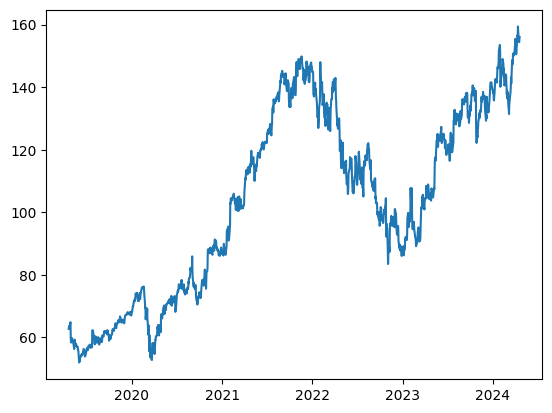

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,101.534500,102.066498,101.626503,101.623001
1,2021-03-26,102.066498,101.626503,101.623001,101.236504
2,2021-03-29,101.626503,101.623001,101.236504,102.289497
3,2021-03-30,101.623001,101.236504,102.289497,102.323502
4,2021-03-31,101.236504,102.289497,102.323502,103.125999
...,...,...,...,...,...
247,2022-03-17,125.950996,129.197998,133.280502,133.839005
248,2022-03-18,129.197998,133.280502,133.839005,136.125504
249,2022-03-21,133.280502,133.839005,136.125504,136.101501
250,2022-03-22,133.839005,136.125504,136.101501,139.867996


In [11]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

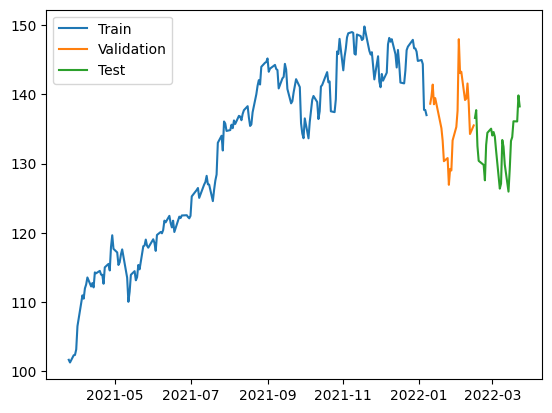

In [12]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 4s 153ms/step - loss: 17474.8887 - mean_absolute_error: 131.5476 - val_loss: 18555.6270 - val_mean_absolute_error: 136.1279
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 17341.9102 - mean_absolute_error: 131.0392 - val_loss: 18407.2520 - val_mean_absolute_error: 135.5817
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 17197.2266 - mean_absolute_error: 130.4842 - val_loss: 18257.2246 - val_mean_absolute_error: 135.0271
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 17031.3711 - mean_absolute_error: 129.8422 - val_loss: 18038.8652 - val_mean_absolute_error: 134.2160
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 16783.7051 - mean_absolute_error: 128.8884 - val_loss: 17725.8770 - val_mean_absolute_error: 133.0448
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 16440.7578 - mean_absolute_error: 127.5445 - val_loss: 17

7/7 [==============================] - 1s 6ms/step


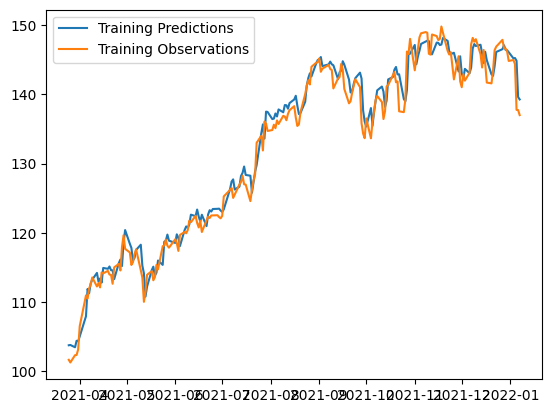

In [14]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 26ms/step


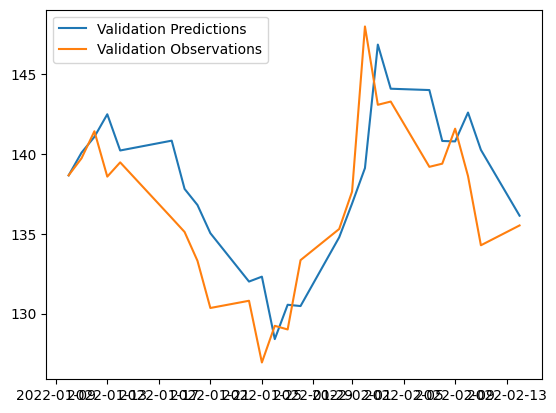

In [15]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


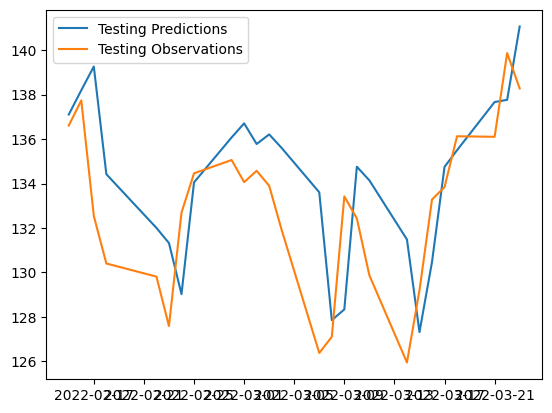

In [16]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

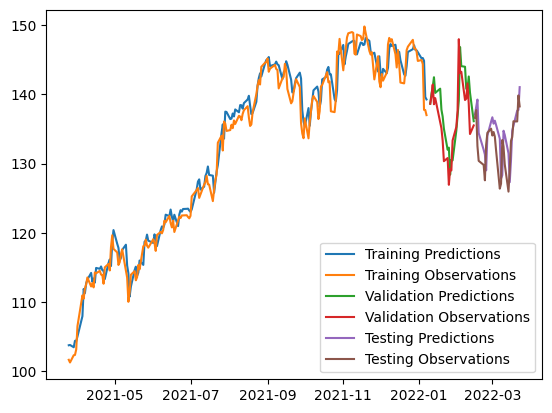

In [17]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [18]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 35ms/step


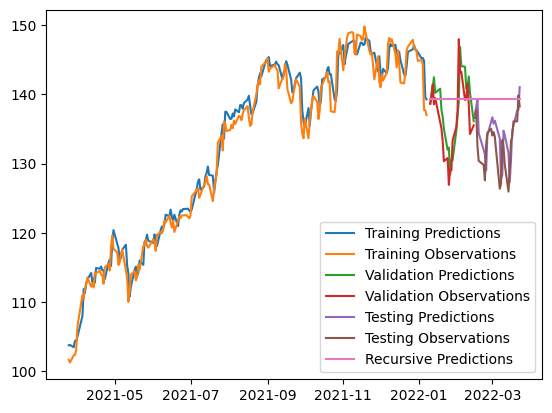

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])